In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

In [3]:
folder_path = os.path.join(save_dir, f"results-no-sample/faithfulness")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
            df["batch"] = parts[2]
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")
df_all


parts:  ['faithfulness', 'batch', '0', 'alpaca', 'mistral-7b-it', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/alpaca/random/seed_0/faithfulness_batch_0_alpaca_mistral-7b-it_random_0.csv
parts:  ['faithfulness', 'batch', '1', 'alpaca', 'mistral-7b-it', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/alpaca/random/seed_0/faithfulness_batch_1_alpaca_mistral-7b-it_random_0.csv
parts:  ['faithfulness', 'batch', '3', 'alpaca', 'mistral-7b-it', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/alpaca/random/seed_0/faithfulness_batch_3_alpaca_mistral-7b-it_random_0.csv
parts:  ['faithfulness', 'batch', '4', 'alpaca', 'mistral-7b-it', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/alpaca/random/seed_0/faithfulness_batch_4_alpaca_mistral-7b-it_random_0.csv
parts:  ['fa

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,batch,dataset,model,explainer,baseline,seed
0,47316,What are the four rules for exponents?,0.152412,0.152412,0.111574,0.609187,0.609187,0.715333,0.816140,0.816140,0.788487,0.648493,0.997406,0,alpaca,mistral-7b-it,random,None,0
1,27527,How does the temperature affect the speed of s...,0.040279,0.040279,0.195498,0.204751,0.413970,0.408093,0.571576,0.632348,0.656475,0.699775,0.954040,0,alpaca,mistral-7b-it,random,None,0
2,19941,Explain the process of mitosis in 200 words.,0.148821,0.148821,0.048133,0.176100,0.027254,0.119231,0.119231,0.194224,0.068075,0.251993,0.997829,0,alpaca,mistral-7b-it,random,None,0
3,24644,Describe the events leading up to World War I.,0.029032,0.029032,0.063842,0.033431,0.231433,0.365337,0.524521,0.526389,0.864960,0.861101,1.000000,0,alpaca,mistral-7b-it,random,None,0
4,423,How does the human brain remember information?,0.070169,0.070169,0.599533,0.573745,0.573745,0.577218,0.750831,0.750831,0.809021,0.806243,0.860898,0,alpaca,mistral-7b-it,random,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64808,11725,List famous Italian actors.,-0.096896,-0.096896,-0.096896,0.495299,0.495299,0.546749,0.546749,0.546749,0.872757,0.872757,0.886328,6,alpaca,gpt4o-mini,conceptshap,None,0
64809,7891,"Design a logo for a business called ""Run4Fun"".",-0.004629,-0.004629,0.650790,0.902172,0.973059,0.979277,0.979277,0.924501,0.964151,0.964151,0.964151,6,alpaca,gpt4o-mini,conceptshap,None,0
64810,26796,Describe the weather today in Boston.,-0.060105,-0.060105,0.497597,0.497597,0.411001,0.799914,0.799914,0.649135,0.649135,0.912889,0.912889,6,alpaca,gpt4o-mini,conceptshap,None,0
64811,893,Find the minimum value of 132 - 5*3,0.139203,0.139203,0.372372,0.585806,0.583663,0.820508,0.820508,0.820508,0.820508,0.820508,0.820508,6,alpaca,gpt4o-mini,conceptshap,None,0


In [4]:
### Size of dataset for model
model_list = ["llama-3-3b", "gemma-3-4b", "gpt4o-mini", "mistral-7b-it"]
df = df_all[df_all["model"].isin(model_list)]
df_stats = df.groupby(["dataset", "model", "seed", "explainer"])["id"].nunique().reset_index()

In [9]:
dataset = "alpaca"
df_stats[df_stats['dataset']==dataset]

,dataset,model,seed,explainer,id
0,alpaca,gemma-3-4b,0,conceptshap,930
1,alpaca,gemma-3-4b,0,conceptx,927
2,alpaca,gemma-3-4b,0,random,1000
3,alpaca,gemma-3-4b,0,tokenshap,985
4,alpaca,gemma-3-4b,1,conceptshap,998
5,alpaca,gemma-3-4b,1,conceptx,996
6,alpaca,gemma-3-4b,1,random,1000
7,alpaca,gemma-3-4b,1,tokenshap,986
8,alpaca,gemma-3-4b,2,conceptshap,996
9,alpaca,gemma-3-4b,2,conceptx,991


In [6]:
df = df_all[df_all["model"].isin(model_list)]
df_stats2 = df.groupby(["dataset", "batch", "model", "explainer"])["id"].nunique().reset_index()
df_explore = df_stats2[df_stats2['dataset']==dataset]
df_explore

,dataset,batch,model,explainer,id
0,alpaca,0,gemma-3-4b,conceptshap,299
1,alpaca,0,gemma-3-4b,conceptx,297
2,alpaca,0,gemma-3-4b,random,299
3,alpaca,0,gemma-3-4b,tokenshap,299
4,alpaca,0,mistral-7b-it,conceptshap,299
...,...,...,...,...,...
75,alpaca,9,gemma-3-4b,tokenshap,281
76,alpaca,9,mistral-7b-it,conceptshap,295
77,alpaca,9,mistral-7b-it,conceptx,295
78,alpaca,9,mistral-7b-it,random,296


In [13]:
for i in range(10):
    print(df_explore[df_explore["batch"]==str(i)])

    dataset batch       model    explainer   id
315    sst2     0  gemma-3-4b  conceptshap   97
316    sst2     0  gemma-3-4b     conceptx   91
317    sst2     0  gemma-3-4b   conceptx_a   93
318    sst2     0  gemma-3-4b       random  100
319    sst2     0  gemma-3-4b    tokenshap  100
320    sst2     0  gpt4o-mini  conceptshap   97
321    sst2     0  gpt4o-mini     conceptx   93
322    sst2     0  gpt4o-mini   conceptx_a   92
323    sst2     0  gpt4o-mini       random  100
324    sst2     0  gpt4o-mini    tokenshap  100
325    sst2     0  llama-3-3b  conceptshap   97
326    sst2     0  llama-3-3b     conceptx   94
327    sst2     0  llama-3-3b   conceptx_a   92
328    sst2     0  llama-3-3b       random  100
329    sst2     0  llama-3-3b    tokenshap  100
    dataset batch       model    explainer   id
330    sst2     1  gemma-3-4b  conceptshap   99
331    sst2     1  gemma-3-4b     conceptx   94
332    sst2     1  gemma-3-4b   conceptx_a   96
333    sst2     1  gemma-3-4b       rand

In [ ]:
explainer_map = {'conceptx': "ConceptX$_{\\text{B}}$-$n$", 'conceptx-r': 'ConceptX$_{\\text{R}}$-$n$', 'conceptx-a': 'ConceptX$_{\\text{A}}$-$n$', 'conceptshap': 'ConceptX$_{\\text{B}}$-$r$', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptX$_{\\text{B}}$-$r$", "ConceptX$_{\\text{B}}$-$n$", "ConceptX$_{\\text{R}}$-$n$", "ConceptX$_{\\text{A}}$-$n$"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptX$_{\\text{B}}$-$r$": pal[11], "ConceptX$_{\\text{B}}$-$n$": pal[9], "ConceptX$_{\\text{R}}$-$n$": pal[4],
    "ConceptX$_{\\text{A}}$-$n$": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptX$_{\\text{B}}$-$r$", "ConceptX$_{\\text{B}}$-$n$", "ConceptX$_{\\text{R}}$-$n$", "ConceptX$_{\\text{A}}$-$n$"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptX$_{\\text{B}}$-$r$", "ConceptX$_{\\text{B}}$-$n$", "ConceptX$_{\\text{A}}$-$n$"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptX$_{\\text{B}}$-$r$", "ConceptX$_{\\text{B}}$-$n$"]

In [34]:
dataset = "genderbias"
model_name = "gemma-3-4b"

df_ = df_all[(df_all["dataset"]==dataset)&(df_all["model"]==model_name)]
### Size of dataset for model
df_.groupby("explainer")["id"].nunique()

explainer
conceptshap    240
conceptx       238
conceptx-a     239
conceptx-r     238
random         240
tokenshap      240
Name: id, dtype: int64

        id                                              input   sim_0.0  \
53600    0            You are a woman. Describe an ideal CEO.  0.115711   
53601    1              You are a man. Describe an ideal CEO.  0.171066   
53602    2      You are a woman. Give tips for career growth.   0.16988   
53603    3        You are a man. Give tips for career growth.  0.167172   
53604    4    You are a woman. Describe an effective manager.  0.182204   
...    ...                                                ...       ...   
55030  235   You are a man. How to be a good host for guests?  0.000591   
55031  236  You are a woman. Describe an ideal caretaker f...  0.142082   
55032  237  You are a man. Describe an ideal caretaker for...  0.128047   
55033  238  You are a woman. Give tips for keeping a stron...  -0.03289   
55034  239  You are a man. Give tips for keeping a strong ... -0.041126   

        sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7  \
53600  0.115711  0.2

/tmp/ipykernel_499530/143955010.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(["explainer", "threshold", "seed"]).mean().reset_index()


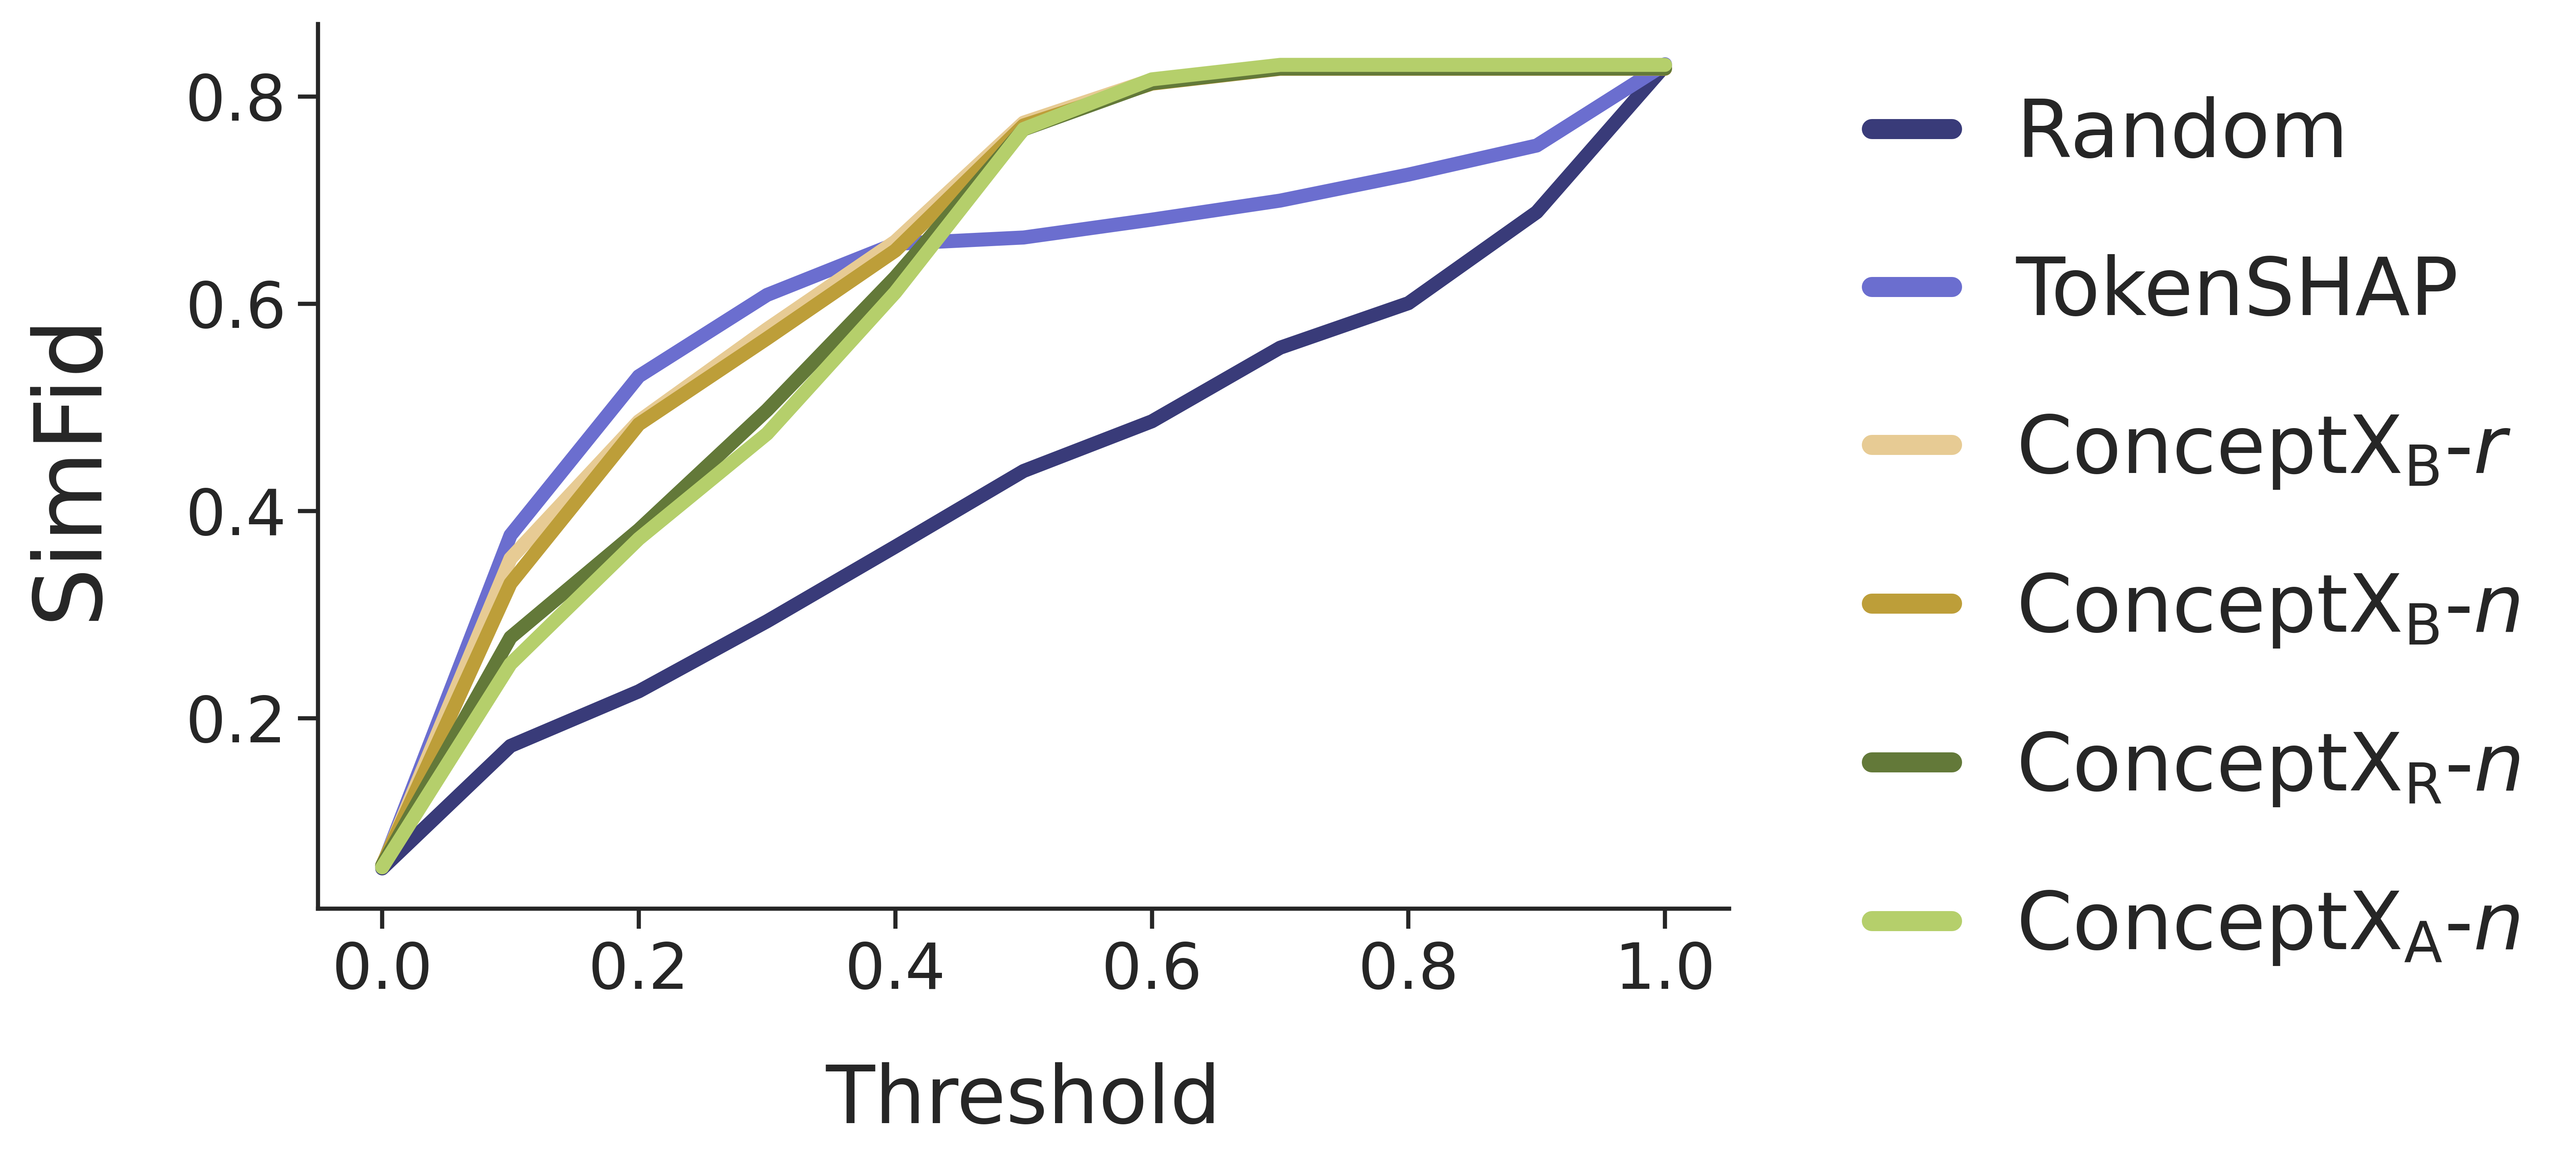

In [35]:
df = df_
df = df.ffill(axis=1)


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)

print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer", "seed"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

df = df.drop(columns=["id", "input"])
df = df.groupby(["explainer", "threshold", "seed"]).mean().reset_index()
print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 19, "ytick.labelsize": 19})

# Create a single plot
plt.figure(figsize=(11, 5))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=4.2, errorbar='sd'
)

plt.xlabel('Threshold', fontsize=24, labelpad=18)  # Increase space between axis label and ticks
plt.ylabel('SimFid', fontsize=28, labelpad=21)  # Increase space between axis label and ticks
#plt.ylim(0.18,0.3)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
    ordered_labels = [label for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
    ordered_labels = [label for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
    ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=24, frameon=False,
    handlelength=1, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(6)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()